In [2]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 61.8 MB/s eta 0:00:00


In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Load the dataset
ds = xr.open_dataset('MAIAC_AOD_2024.nc')

In [5]:
ds.head()

<xarray.Dataset> Size: 140B
Dimensions:  (lat: 5, lon: 5)
Coordinates:
  * lat      (lat) float32 20B 25.0 25.05 25.1 25.15 25.2
  * lon      (lon) float32 20B -108.0 -107.9 -107.9 -107.8 -107.8
Data variables:
    AOD      (lat, lon) float32 100B ...
Attributes:
    title:    Annual mean AOD (lat ascending) for 2024
    history:  Reordered lat to ascending and flipped AOD accordingly
    source:   post-process script

In [6]:
print(ds.data_vars)

Data variables:
    AOD      (lat, lon) float32 276kB ...


In [8]:
# Extract variables
lon = ds.lon.values
lat = ds.lat.values
aod = ds.AOD.values

✅ Map saved as Texas_AOD_Contour_Map.png


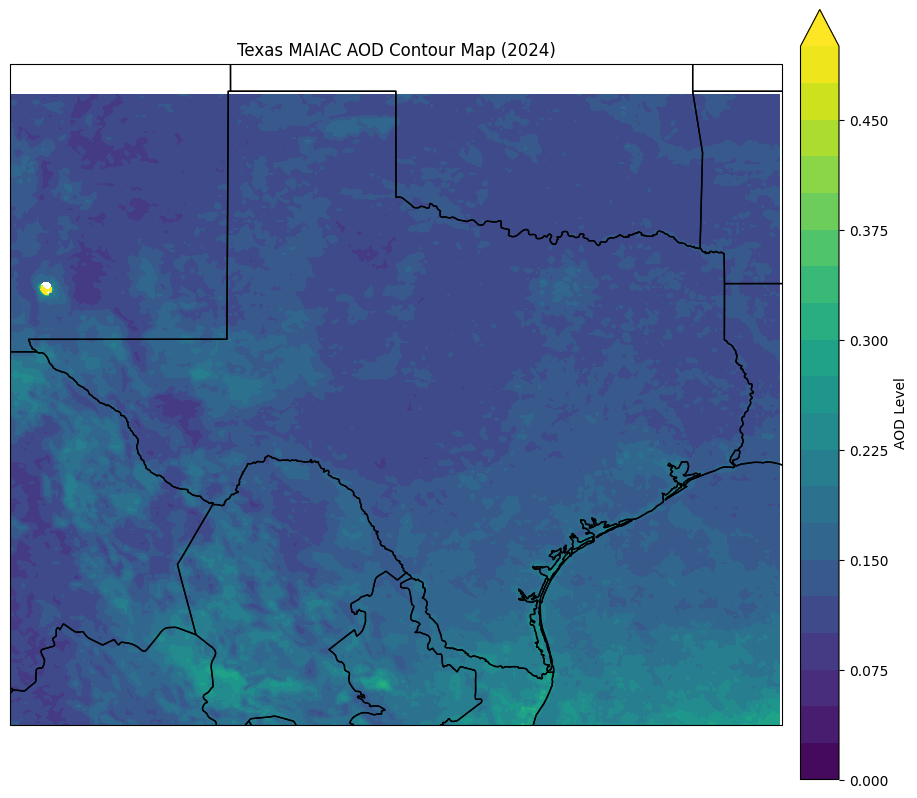

In [24]:

# Create the figure and map projection
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add geographic features for Texas
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-107, -93, 25, 37]) # Zoom in on Texas coordinates

# Create the contour map
#contour = ax.contourf(lon, lat, aod, levels=20, vmin=0, vmax=0.5, cmap='viridis', transform=ccrs.PlateCarree())
# This forces the color steps to happen every 0.05 units between 0 and 0.5
my_levels = np.linspace(0, 0.5, 21)
contour = ax.contourf(lon, lat, aod, levels=my_levels, cmap='viridis', extend='max')
# Add colorbar and labels
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.02, aspect=20)
cbar.set_label('AOD Level')
plt.title('Texas MAIAC AOD Contour Map (2024)')
# Save the map
plt.savefig('Texas_AOD_Contour_image.png', dpi=300, bbox_inches='tight')
print("✅ Map saved as Texas_AOD_Contour_image.png")